In [22]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
# simple function to save and view results
import pickle
def save_data(data,file_name):
    with open(file_name,'wb') as f:
        pickle.dump(data,f)
    print('save successfully')
def load_data(file_name):
    with open(file_name,'rb') as f:
        data = pickle.load(f)
    print('load successfully')
    return data

In [117]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 1
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x12b5c0bb0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x12ad4aaf0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x12b5c0bb0>)


In [118]:
counts = 0
for inputs_batch, targets_batch in test_data:
    counts += 1
    print(inputs_batch.shape)
    print(targets_batch.shape)

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 78

(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 47)
(1, 784)
(1, 4

In [119]:
print(counts)

15800


load successfully


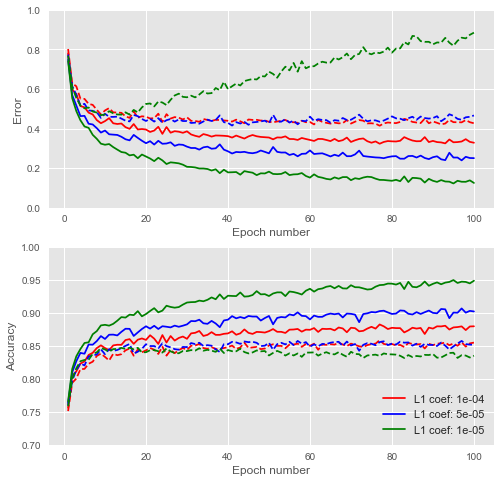

In [112]:
# L1 plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/L1.npy')
color = ['r','b','g','m','c']
L1Penalty_coefficients = [1e-04, 5e-05, 1e-05]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,1])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='L1 coef: {0:.0e}'.format(L1Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
#ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.7,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='L1 coef: {0:.0e}'.format(L1Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
ax_4.legend(loc=4, fontsize = 11)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/L1.pdf')

load successfully


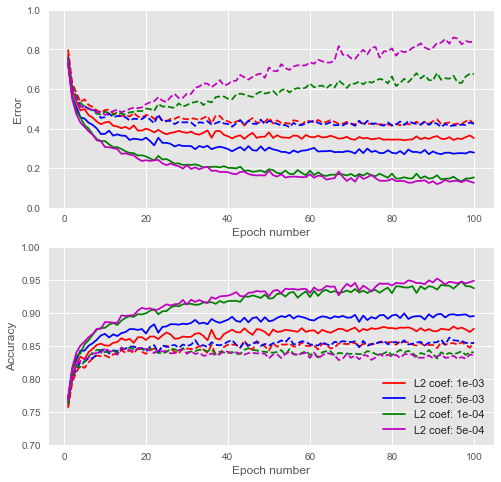

In [113]:
# L2 plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/L2.npy')
color = ['r','b','g','m','c']
L2Penalty_coefficients = [1e-03, 5e-03, 1e-04, 5e-04]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,1])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='L2 coef: {0:.0e}'.format(L2Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
#ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.7,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='L2 coef: {0:.0e}'.format(L2Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
ax_4.legend(loc=4, fontsize = 11)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/L2.pdf')

load successfully


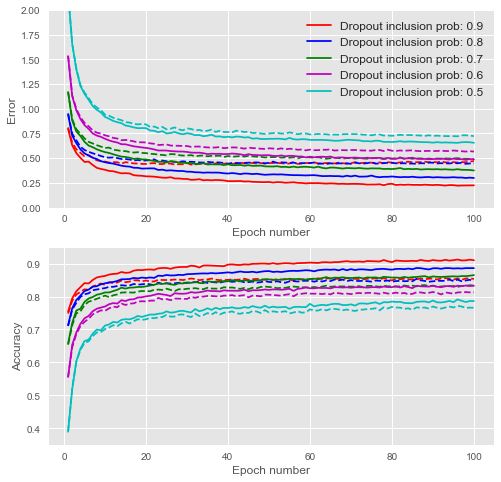

In [114]:
# Dropout plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/Dropout.npy')
color = ['r','b','g','m','c']
Drop_p = [0.9, 0.8, 0.7, 0.6, 0.5]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,2])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='Dropout inclusion prob: {}'.format(Drop_p[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.35,0.95])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='Dropout inclusion prob: {}'.format(Drop_p[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/Dropout.pdf')

load successfully


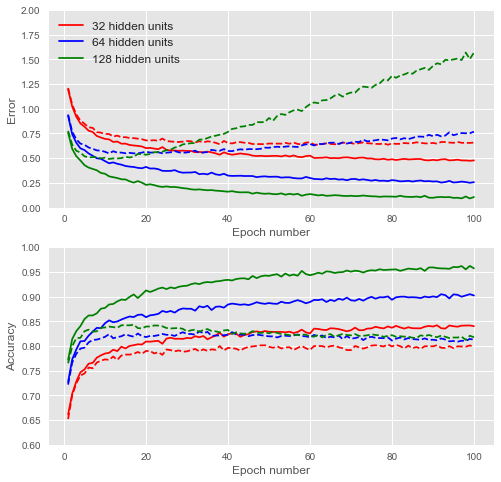

In [115]:
# Units plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/units.npy')
Units = [32, 64, 128]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,2])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='{} hidden units'.format(Units[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)
ax_3.grid

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.6,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='{} hidden units'.format(Units[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/units.pdf')

load successfully


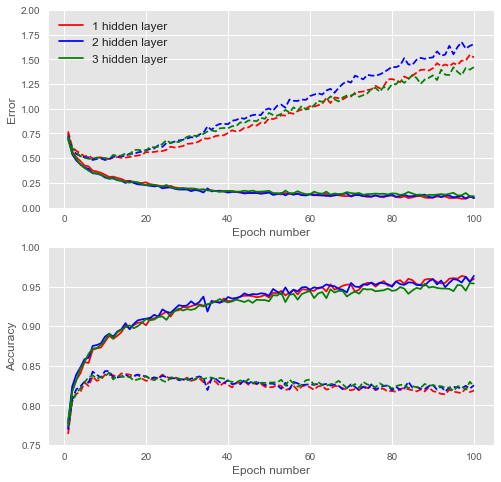

In [116]:
# Layers plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/layers.npy')
layers = [1, 2, 3]
stats_interval = 1


fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,2])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='{} hidden layer'.format(layers[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.75,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='{} hidden layer'.format(layers[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/layers.pdf')